### Tensorflow on MNIST

In [1]:
import tensorflow as tf
# check the version of tf
tf.__version__

'2.1.0'

In [2]:
# import the dataset
mnist_data = tf.keras.datasets.mnist

# split the data into train and test
(x_train, y_train), (x_test, y_test) = mnist_data.load_data()

In [8]:
# print the first observation from training data
#x_train[0]

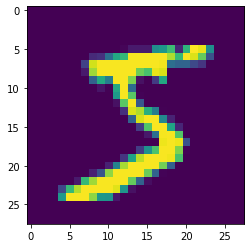

In [5]:
# visualize the data
import matplotlib.pyplot as plt

plt.imshow(x_train[0])

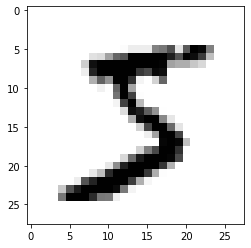

In [6]:
# to remove the color from the visualization above
plt.imshow(x_train[0], cmap = plt.cm.binary)

In [10]:
# normalize the data
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)
#x_train[0]

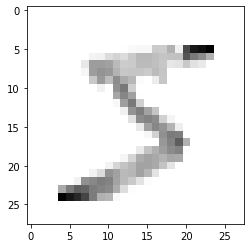

In [14]:
# visualiza the first observation post normalization
plt.imshow(x_train[0], cmap=plt.cm.binary)

In [15]:
# build model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten()) #input layer
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu)) # 1st hidden layer
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu)) # 2nd hidden layer
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax)) #output layer

In [16]:
model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [17]:
# fit the model
model.fit(x_train, y_train, epochs=3)

Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 3s 44us/sample - loss: 0.2761 - accuracy: 0.9186
Epoch 2/3
60000/60000 [==============================] - 2s 40us/sample - loss: 0.1143 - accuracy: 0.9650
Epoch 3/3
60000/60000 [==============================] - 2s 41us/sample - loss: 0.0784 - accuracy: 0.9756


In [18]:
# evaluate the model
val_loss, val_accu = model.evaluate(x_test, y_test)
print(val_loss, val_accu)

10000/10000 [==============================] - 0s 27us/sample - loss: 0.1077 - accuracy: 0.9683
0.10769272644054145 0.9683


In [19]:
# save the model
model.save("mnist_model")

#load the model
new_model = tf.keras.models.load_model("mnist_model")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: mnist_model/assets


In [20]:
# predict on testing data
predictions = new_model.predict(x_test)
predictions

array([[8.6768416e-08, 1.8258833e-08, 1.3939005e-05, ..., 9.9983978e-01,
        2.8757739e-08, 8.7835480e-07],
       [5.2525351e-08, 2.2844757e-05, 9.9990714e-01, ..., 2.2237907e-09,
        4.6387427e-06, 6.4316621e-12],
       [4.7495558e-08, 9.9970752e-01, 1.1847055e-05, ..., 9.6721393e-05,
        1.4119083e-04, 4.5456216e-07],
       ...,
       [1.4462859e-07, 1.1797366e-05, 5.4146238e-07, ..., 4.5017296e-04,
        2.9667401e-05, 5.0366303e-04],
       [2.5453346e-06, 7.9347672e-05, 6.3384221e-08, ..., 1.0211546e-06,
        2.6761882e-03, 1.0959141e-06],
       [2.0651487e-07, 4.6846447e-09, 3.6823000e-08, ..., 7.6428606e-11,
        4.7545887e-09, 8.2254384e-11]], dtype=float32)

In [21]:
import numpy as np

np.argmax(predictions[0])

7

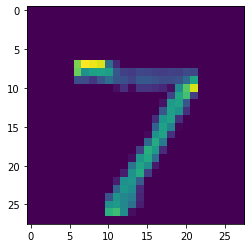

In [22]:
plt.imshow(x_test[0])